# Importance Sampling and Random Walks

In [1]:
from array import array
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.pyplot import figure

In [2]:
def read(file):
    data = np.genfromtxt(file)
    measure = data[::, 0]
    errors = data[::, 1]
    return measure, errors

In [3]:
N = 100
M = 1000000
L=int(M/N)
x = np.arange(N)+1

# Importance Sampling

The aim is to compute the integral

$$I = \frac{\pi}{2} \int_0^1 \cos(\pi x/2) dx = 1$$

We try to do that by employing the importance sampling technique, which consists in extracting a bunch of random numbers from an appropriate probability distribution function, evaluate the integrand (divided by the pdf) in those points, and then averaging over them. This is just a generalization of the mean value theorem, with the important feature that **the more the pdf resembles the integrand**, the more the **variance** of the results is reduced. Indeed, if we could sample points from the integrand itself the variance would approach zero.

Three distributions are taken under examination: uniform, (which just recovers the mean value theorem), linear and quadratic.

For each pdf  $M = 10^6$ extractions are made, which are then blocked in $N = 100$ sets which is what our measurements consist of

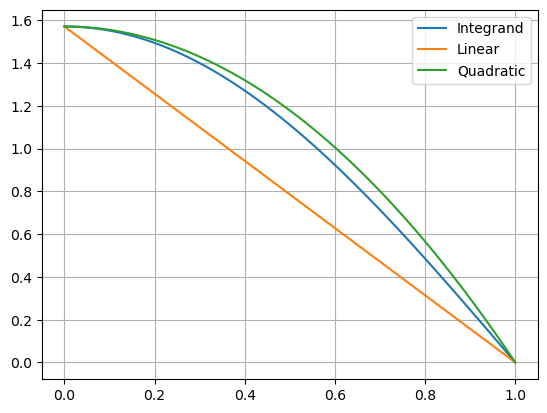

In [4]:
t = np.linspace(0,1, num = 100)
y = math.pi*.5*np.cos(math.pi * t/2)
plt.plot(t,y, label='Integrand')
plt.plot(t, .5*np.pi*(1-t), label='Linear')
plt.plot(t, math.pi*.5*(1 - t**2), label='Quadratic')
plt.legend()
plt.grid()

From this we see that the functions employed at least try to reproduce the trend of the integrand, and match with it at the borders of the integration domain

## Uniform Distribution (standard mean)

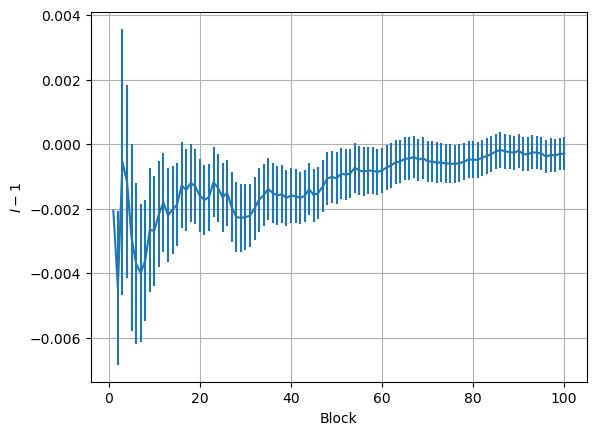

In [5]:
res = read('ImportanceSampling/OUTPUT/IntCosUni.dat')
plt.errorbar(x, res[0] - 1, res[1])
plt.xlabel('Block')
plt.ylabel('$ I - 1$')
plt.grid()
plt.show()

### Results

In [6]:
print('Result = ', res[0][N-1]) 
print('Error = ', res[1][N-1]) 
print('Accordance with expected value: ', (res[0][N-1] - 1)**2/res[1][N-1]**2)

Result =  0.99971
Error =  0.000501266
Accordance with expected value:  0.33470291863163415


## Linear Distribution

The distribution \
\
$$p(x) = 2 (1 - x)$$
\
\
is sampled by means of the inverse cumulative function method and the integral is evaluated

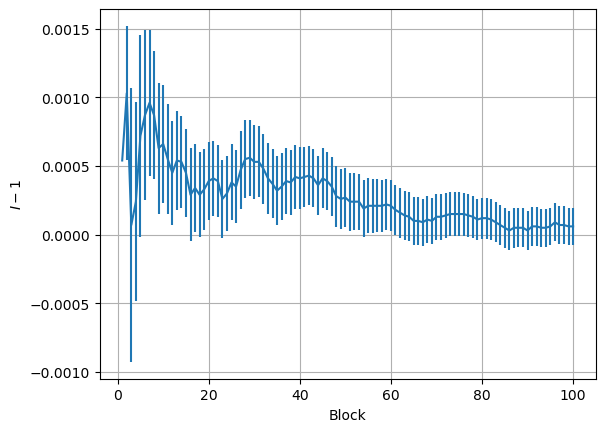

In [7]:
res = read('ImportanceSampling/OUTPUT/IntCosLin.dat')
plt.errorbar(x, res[0]-1, res[1])
plt.xlabel('Block')
plt.ylabel('$ I - 1$')
plt.grid()
plt.show()

### Results

In [8]:
print('Result = ', res[0][N-1]) 
print('Error = ', res[1][N-1]) 
print('Accordance with expected value: ', (res[0][N-1] - 1)**2/res[1][N-1]**2)

Result =  1.00006
Error =  0.000134265
Accordance with expected value:  0.19969944983142046


## Quadratic Distribution

We sample the distribution


$$
p(x) = \frac{3}{2} (1 - x^2)
$$


with the try and catch method

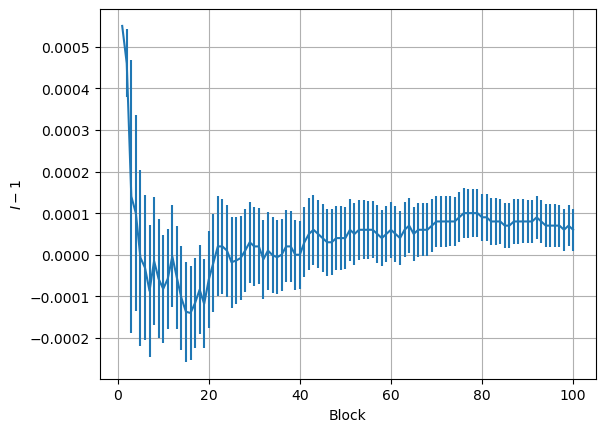

In [9]:
res = read('ImportanceSampling/OUTPUT/IntCosQuad.dat')
plt.errorbar(x, res[0]-1, res[1])
plt.xlabel('Block')
plt.ylabel('$ I - 1$')
plt.grid()
plt.show()

### Results

In [10]:
print('Result = ', res[0][N-1]) 
print('Error = ', res[1][N-1])
print('Accordance with expected value: ', (res[0][N-1] - 1)**2/res[1][N-1]**2)

Result =  1.00006
Error =  4.99558e-05
Accordance with expected value:  1.4425492998709173


Looking into the results for the errors on the integrals in all three cases we see what we would have expected, i.e. that the error is smaller the more the pdf resembles the integrand

# Random Walks

In the C++ implementation 10.000 walkers take 10.000 steps. At each step they are blocked into 100 subsets on which the square root of the average distance squared is taken. These are the stochastic variables over which uncertainties are computed. The plots show the behavior of $\sqrt{<r>^2}$ as the walkers take steps

## Discrete random walk

First we are going to consider a random walk on a cubic lattice. At each step there is an equal probability that the walker takes a step in each of the 2 $\times$ 3 possible directions

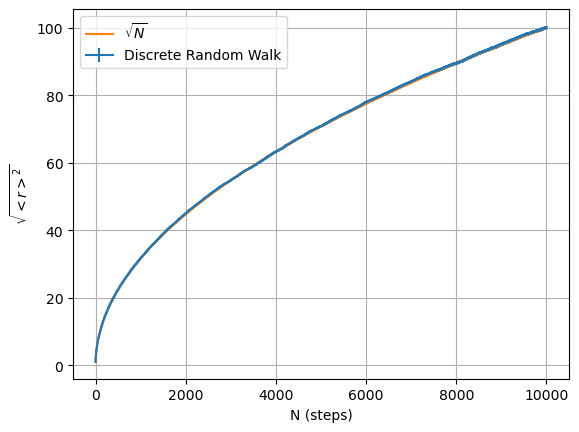

In [11]:
res = read('RandomWalk/OUTPUT/DistanzeDRW.dat')
plt.errorbar(np.arange(10000)+1, res[0], res[1], label='Discrete Random Walk')
plt.plot(np.arange(10000)+1, np.sqrt(np.arange(10000)+1), label='$\sqrt{N}$')
plt.xlabel('N (steps)')
plt.ylabel('$\sqrt{<r>^2}$')
plt.grid()
plt.legend()
plt.show()

## Continuous random walk

Moving on to the continuous case, at each step that a walker takes, a solid angle over a sphere is sampled to specify the direction in which the move is performed

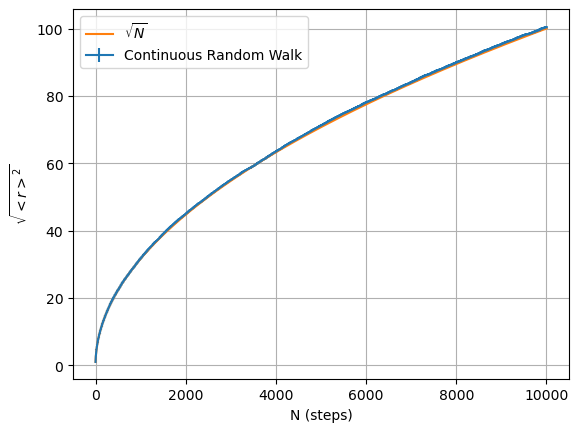

In [12]:
res = read('RandomWalk/OUTPUT/DistanzeCRW.dat')
plt.errorbar(np.arange(10000)+1, res[0], res[1], label='Continuous Random Walk')
plt.plot(np.arange(10000)+1, np.sqrt(np.arange(10000)+1), label='$\sqrt{N}$')
plt.xlabel('N (steps)')
plt.ylabel('$\sqrt{<r>^2}$')
plt.grid()
plt.legend()
plt.show()

## Diffusive behavior

From the plots it is clear how the random walks, both discrete and continuous, exhibit a diffusive behavior with proportionality constant equal to 1. This has to do with how the distance from the origin is distributed: it turns out that its distribution satisfies the diffusion equation, and confronting the parameters one finds that $\sqrt{<r>^2}$ scales as $\sqrt{N}$. On a more intuitive level, it's as if in the beginning the distance from the origin grows quite rapidly, but since the steps tend to cancel each other to some extent, the walker exhausts its propulsive power in the long run. Wanting to just consider crude math, on the other hand, we have that $\sqrt{<r>^2}$ is the root mean squared of the position, and since the position is expected to be 0, it coincides with the standard deviation, which notoriously scales as $\sqrt{N}$